In [1]:
# Importing the libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# loading the dataset

In [2]:
dataset=tf.keras.datasets.mnist.load_data()

In [3]:
(X_train,y_train),(X_test,y_test)=dataset

In [4]:
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

# visualizing the dataset

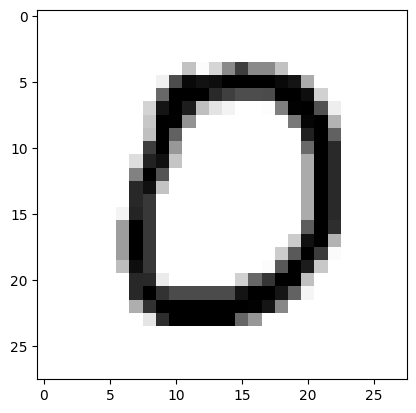

In [5]:
plt.imshow(X_test[10],cmap="binary")

# building the model

In [6]:
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))


In [7]:
model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy")

In [8]:
history=model.fit(X_train,y_train,epochs=10,callbacks=tf.keras.callbacks.EarlyStopping(),validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 14s 7ms/step - loss: 1.0385 - val_loss: 0.3410
Epoch 2/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2560 - val_loss: 0.2225
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1958 - val_loss: 0.1977
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1568 - val_loss: 0.1862
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1335 - val_loss: 0.1738
Epoch 6/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.1141 - val_loss: 0.1432
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1032 - val_loss: 0.1297
Epoch 8/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0934 - val_loss: 0.1613


In [29]:
model_history=model.evaluate(X_test,y_test)
model_history

313/313 [==============================] - 2s 4ms/step - loss: 0.1572


0.15716026723384857

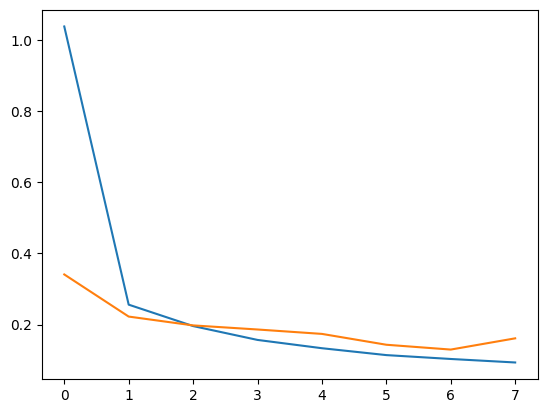

In [23]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [27]:
model.save("model.h5")

In [30]:
model=tf.keras.models.load_model("model.h5")

In [31]:
prediction=model.predict([X_test])

313/313 [==============================] - 2s 4ms/step


In [36]:
y_test[100]==np.argmax(prediction[100])

True

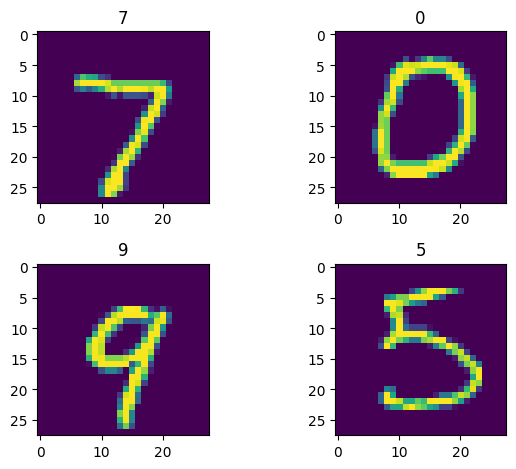

In [37]:
fig,ax=plt.subplots(2,2)

ax[0,0].imshow(X_test[0])
ax[0,0].set_title(np.argmax(prediction[0]))
ax[0,1].imshow(X_test[10])
ax[0,1].set_title(np.argmax(prediction[10]))
ax[1,0].imshow(X_test[12])
ax[1,0].set_title(np.argmax(prediction[12]))
ax[1,1].imshow(X_test[15])
ax[1,1].set_title(np.argmax(prediction[15]))

plt.tight_layout()
plt.show()